In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from scripts import *
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

raw_df = pd.read_csv('../data/country-data.csv')
cluster_num = 3
scaler = 'minmax'
rs = 10
countries, df = pre_process_data(raw_df, pca=False, scaler=scaler, plot_scree_plot=False)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


# Experiment 1
- Using all 9 features from the HELP International dataset
- Doing PCA and not doing PCA
- GMM

### Deciding the number of clusters

[-0.3938500013939585,
 -0.5470188941838874,
 -0.6050288231357265,
 -0.6443395437260045,
 -0.6742091325548102]

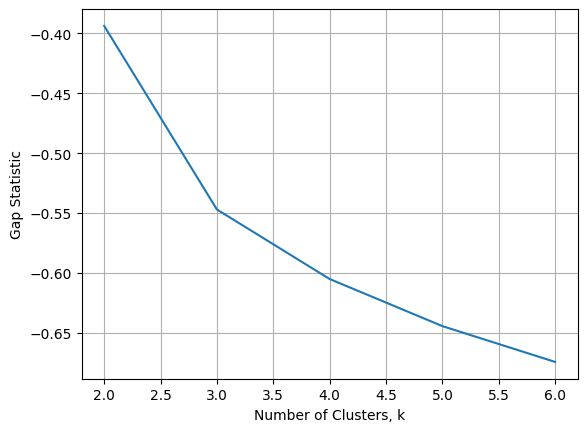

In [3]:
import warnings
warnings.filterwarnings('ignore')
gap_statistic(df, n_clusters=6)

### PCA

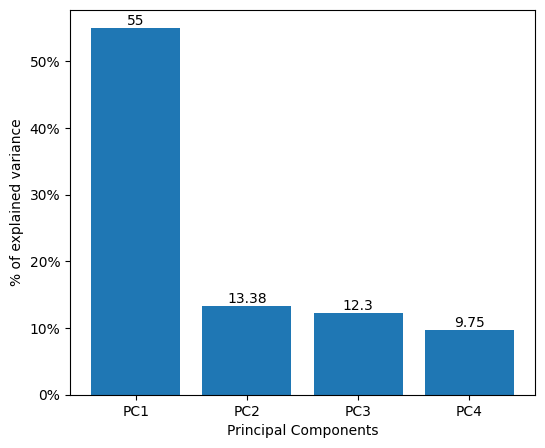

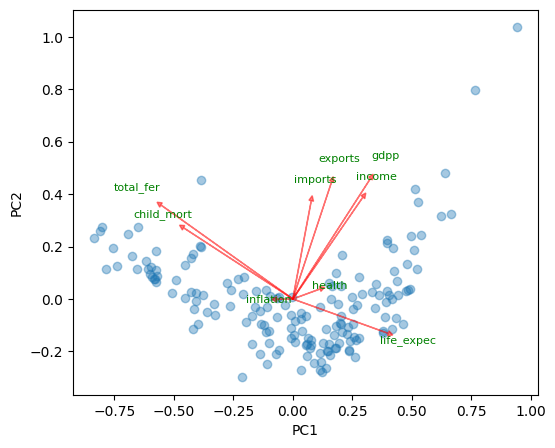

In [2]:
countries, pca_df, pca_explained = pre_process_data(raw_df, 
                                                    pca=True, 
                                                    scaler=scaler, 
                                                    plot_scree_plot=True, 
                                                    pca_components=4, 
                                                    biplot=True)

In [5]:
# This table explains how features are prevalent in each PC1 component
# The higher the more.
pca_explained

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
PC1,-0.476463,0.170333,0.133886,0.081620,0.306981,-0.088009,0.420535,-0.571087,0.338243
PC2,0.281733,0.466644,0.044510,0.394257,0.404405,-0.001602,-0.137520,0.369246,0.476078
PC3,0.100012,-0.390524,0.781911,-0.302775,0.068367,-0.057029,0.007857,0.174836,0.309637
PC4,0.029081,-0.188488,-0.512983,-0.606656,0.372823,0.212621,0.148021,0.173062,0.310448


As seen above: 
- PC1 explains 55% of the variance in the data
- PC2 explains 13.38%
- PC3 explains 12.3 %
- PC4 explains 9.75 %

Aggregated for the first three is:
\>80% variance

Below is a biplot shown indicating which features contributes most to each PC1 and PC2 

### GMM

In [3]:
gmm = GaussianMixture(n_components=cluster_num, random_state=rs)
predicted_df = pd.DataFrame(gmm.fit(df).predict_proba(df)).round(4)
predicted_df

,0,1,2
0,0.0000,1.0000,0.0
1,0.9918,0.0082,0.0
2,0.9942,0.0058,0.0
3,0.0000,1.0000,0.0
4,1.0000,0.0000,0.0
...,...,...,...
162,0.0000,1.0000,0.0
163,1.0000,0.0000,0.0
164,0.5386,0.4614,0.0
165,0.0000,1.0000,0.0


In [8]:
# cluster_num = 3
# fig, ax = plt.subplots(1, 2, figsize=(10, 5)) 

# clustered_pca = apply_hierarchical_clustering(data=pca_df, cluster_num=cluster_num)
# ax[0].scatter(clustered_pca['PC1'], clustered_pca['PC2'], c=clustered_pca['cluster'])
# ax[0].set_title("With PCA")

# clustered = apply_hierarchical_clustering(data=df, cluster_num=cluster_num)
# cluster_pca = pd.DataFrame(pca.fit_transform(clustered.drop(columns=['cluster'])))
# cluster_pca['cluster'] = clustered['cluster']
# ax[1].scatter(cluster_pca[0], cluster_pca[1], c=cluster_pca['cluster'])
# ax[1].set_title("Without PCA")

In [9]:
import warnings
warnings.filterwarnings("ignore")

clustered_df = apply_hierarchical_clustering(
    pca_df[['PC1', 'PC2', 'PC3', 'PC4']]
)
silhouette_score = evalutate_clusters(clustered_df)[0]
clusters = split_in_clusters(clustered_df)

print("Silhouette score: ", silhouette_score)

KeyError: "['PC4'] not in index"

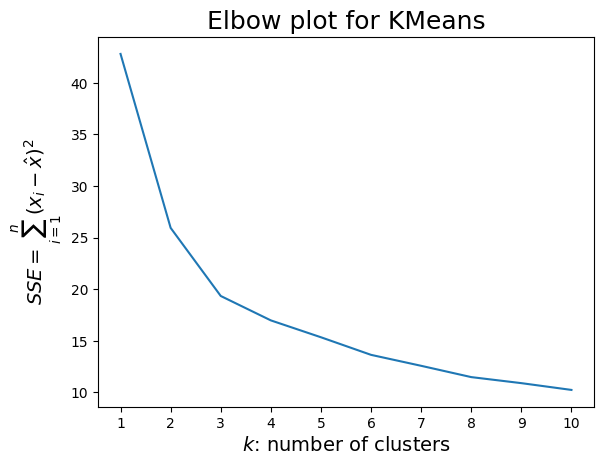

In [ ]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 5,
}

# A list holds the sum of squared errors (SSE) for values of k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel(r"$k$: number of clusters", fontsize=14)
plt.ylabel(r"$SSE = \sum^n_{i=1}(x_i-\hat{x})^2$", fontsize=14)
plt.title("Elbow plot for KMeans", fontsize=18)
plt.show()

In [ ]:
countries, df = pre_process_data(raw_df, pca=False, scaler="minmax")
df = np.array(df.values.tolist())  # Convert the dataframe to a numpy array
gaps = []
ks = np.arange(2, 10)

for k in ks:
    # Use KMeans to cluster the data into n_clusters clusters
    kmeans = KMeans(n_clusters=k)
    c = kmeans.fit(df)
    # Calculate the WCSS of the clusters
    wcss = kmeans.inertia_
    print(wcss)

25.939570818294847
19.345118591450642
16.781002591696126
15.13035133218834
13.744205402768737
12.395412366655105
11.426083424197707
10.792129489554403
